In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import process_SMHI_data as process_data
import meteorological_temporal_data as metdata
import seaborn as sns

# Read in and clean PM10 data

In [3]:
# def a plot function
def plot_function(df, rows, cols, fig_size,  y_labels, fig_path = None, savefig = False):
    fig, axes = plt.subplots(rows, cols, constrained_layout = True, figsize = fig_size)
    annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']

    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .85) # linewidth default = 1.5
        ax.set_ylabel(y_labels)
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        ax.set_xlabel('')
        j += 1
    if savefig:
        plt.savefig(fig_path)

In [4]:
# read in data and clean with import script
df_PM10 = process_data.clean_and_merge_dframes('../air_weather_data/PM10/')

In [5]:
df_PM10.describe().round(3);

In [6]:
# stations was misspelled in SMHI data
df_PM10.rename(columns={'PM$_{10}$, Stockholm Torkel Knutssongatan':'PM$_{10}$, Stockholm Torkel Knutssonsgatan'}, 
               inplace=True)

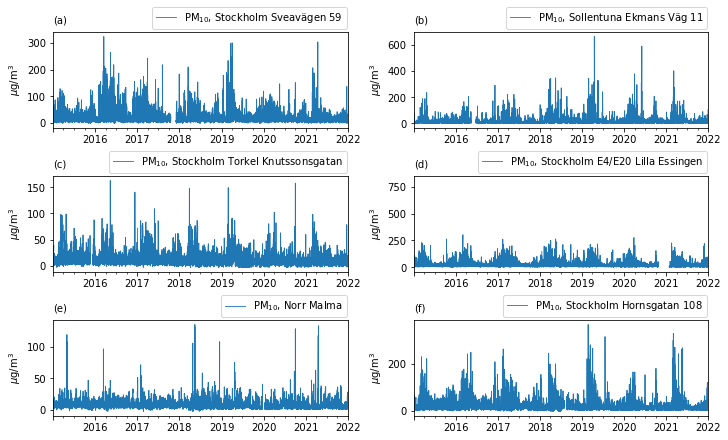

In [7]:
# plot raw PM10 data
plot_function(df_PM10, 3, 2, fig_size=(10,6), y_labels='$\mu$g/m$^3$')

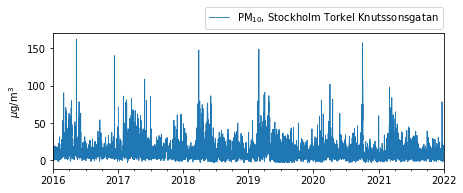

In [8]:
# plot only Torkel Knutssonsgatan station data
df_PM10['PM$_{10}$, Stockholm Torkel Knutssonsgatan']['2016-01-01 00:00:00':].plot(linewidth=.85, figsize=(7,2.5))
plt.ylabel('$\mu$g/m$^3$'), plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)

In [9]:
# check outliers
np.sum(df_PM10 > 800) # the value above 800 is most likely an outlier (surrounding values are all NaNs)

PM$_{10}$, Stockholm Sveavägen 59             0
PM$_{10}$, Sollentuna Ekmans Väg 11           0
PM$_{10}$, Stockholm Torkel Knutssonsgatan    0
PM$_{10}$, Stockholm E4/E20 Lilla Essingen    1
PM$_{10}$, Norr Malma                         0
PM$_{10}$, Stockholm Hornsgatan 108           0
dtype: int64

In [10]:
# remove outliers and linearly interpolate all NaN values
df_PM10[df_PM10 >= 800] = np.NaN # remove outlier
df_PM10.interpolate(inplace=True) # linearly interpolate all NaNs

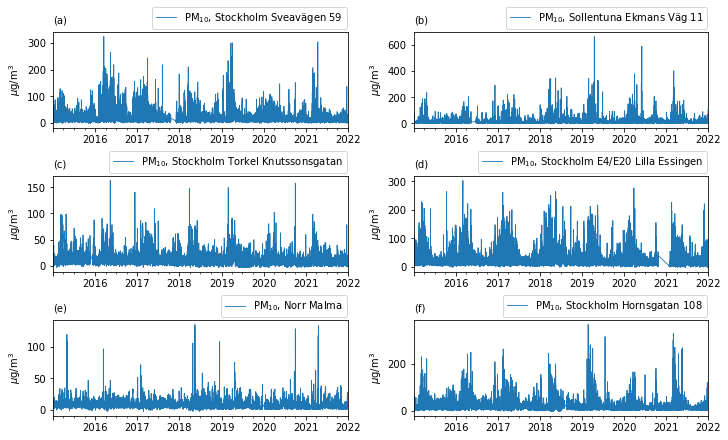

In [11]:
# plot to see results
plot_function(df_PM10, 3, 2, fig_size=(10,6), y_labels='$\mu$g/m$^3$')

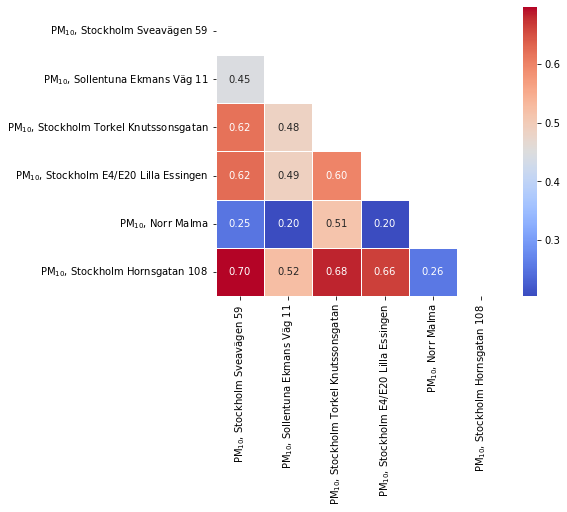

In [12]:
mat = df_PM10.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

In [13]:
# save cleaned dataframe
df_PM10.to_csv('../air_weather_data/PM10_all_stations_cleaned.csv')